# Tested the data on 2 Models 
### 1.FBProphet model(Univariate Time Series model)❌
#####  This model is just tested but will not be used as it is univariate not that accurate!(Acc. to me🙄). 


In [5]:
!pip install prophet numpy pandas seaborn 
!pip install matplotlib
!pip install prophet
!pip install statsmodels
!pip install pickle

You should consider upgrading via the 'c:\users\win10\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\win10\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\win10\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\win10\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the 'c:\users\win10\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [6]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs(y_true-y_pred)/y_true)*100
    

In [7]:
nifty_data = pd.read_csv('./NIFTY 50-11-06-2023-to-11-06-2024.csv')
nifty_data.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
243,04-JUN-2024,23179.50,23179.50,21281.45,21884.50,1006105058,93786.44
244,05-JUN-2024,22128.35,22670.40,21791.95,22620.35,638487077,64326.85
245,06-JUN-2024,22798.60,22910.15,22642.60,22821.40,480413289,49047.39
246,07-JUN-2024,22821.85,23320.20,22789.05,23290.15,473554898,47621.54
247,10-JUN-2024,23319.15,23411.90,23227.15,23259.20,304392368,29060.40


In [8]:
# Strip whitespace from column names
nifty_data.columns = nifty_data.columns.str.strip()
# Convert 'Date' column to datetime
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])

# Display basic statistical information
print(nifty_data.describe())

                                Date          Open          High          Low  \
count                            248    248.000000    248.000000    248.00000   
mean   2023-12-09 10:27:05.806451712  20818.821169  20899.137097  20714.29254   
min              2023-06-12 00:00:00  18595.050000  18633.600000  18559.75000   
25%              2023-09-07 18:00:00  19552.500000  19594.962500  19485.60000   
50%              2023-12-09 12:00:00  20942.425000  20984.025000  20857.42500   
75%              2024-03-06 06:00:00  22080.762500  22202.762500  21948.23750   
max              2024-06-10 00:00:00  23337.900000  23411.900000  23227.15000   
std                              NaN   1355.635235   1375.687082   1328.63623   

              Close  Shares Traded  Turnover (₹ Cr)  
count    248.000000   2.480000e+02       248.000000  
mean   20811.956250   2.960311e+08     27916.915968  
min    18601.500000   1.906457e+07      1572.770000  
25%    19539.187500   2.300780e+08     21674.927500  


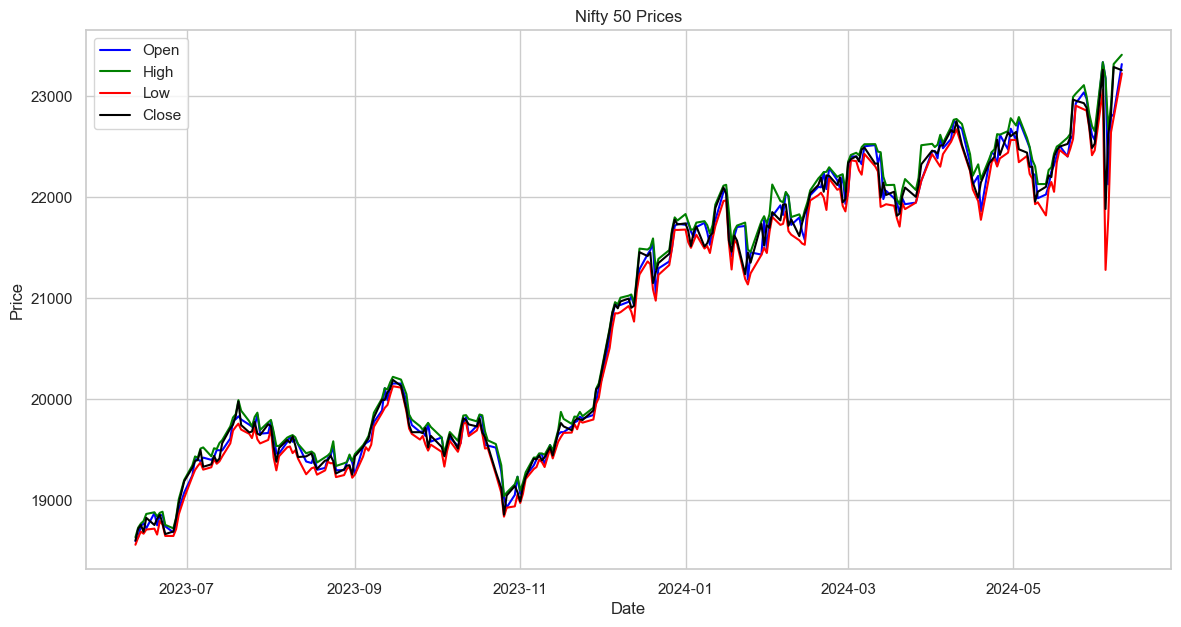

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

# Line plot for Open, High, Low, Close prices
plt.figure(figsize=(14, 7))
plt.plot(nifty_data['Date'], nifty_data['Open'], label='Open', color='blue')
plt.plot(nifty_data['Date'], nifty_data['High'], label='High', color='green')
plt.plot(nifty_data['Date'], nifty_data['Low'], label='Low', color='red')
plt.plot(nifty_data['Date'], nifty_data['Close'], label='Close', color='black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Nifty 50 Prices')
plt.legend()
plt.show()

In [10]:
# Convert all float columns to int64
float_columns = nifty_data.select_dtypes(include=['float64']).columns
nifty_data[float_columns] = nifty_data[float_columns].astype('int64')

<Figure size 3000x4500 with 0 Axes>

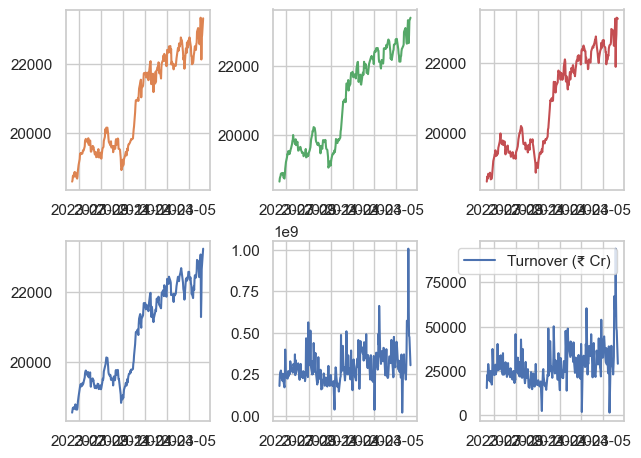

In [11]:
## visualize all columns based on dates
plt.figure(figsize=(30,45))
figure,axes = plt.subplots(nrows=2,ncols=3)
figure.tight_layout()
axes[0,0].plot(nifty_data['Date'],nifty_data['Open'],'C1',label='Open')
axes[0,1].plot(nifty_data['Date'],nifty_data['High'],'C2',label='High')
axes[0,2].plot(nifty_data['Date'],nifty_data['Close'],'C3',label='Close')
axes[1,0].plot(nifty_data['Date'],nifty_data['Low'],label='Low')
axes[1,1].plot(nifty_data['Date'],nifty_data['Shares Traded'],label='Shares Traded')
axes[1,2].plot(nifty_data['Date'],nifty_data['Turnover (₹ Cr)'],label='Turnover (₹ Cr)')
plt.legend()

# Better approch to visualize is seperate graphs for each  
# Or use plt.subplot_adjust to manually change spacing and other settings in graph link :- https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots


In [12]:
from prophet import Prophet
#features =nifty_data[['Open','High','Close','Low','Shares Traded','Turnover (₹ Cr)']]
#for i in features:
#    data = nifty_data
nifty_data.rename(columns={'Open':'y','Date':'ds'},inplace=True)
model = Prophet(interval_width=0.9)
#model.add_regressor('High',standardize=True)
#model.add_regressor('Low',standardize=True)
#model.add_regressor('Close',standardize=True)
#model.add_regressor('Shares Traded',standardize=True)
#model.add_regressor('Turnover (₹ Cr)',standardize=True)
model.fit(nifty_data)

Importing plotly failed. Interactive plots will not work.
20:53:21 - cmdstanpy - INFO - Chain [1] start processing
20:53:22 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# Make future dataframe and predictions
future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
238,2024-05-28,22671.939323,22315.625544,23073.670676,22671.939323,22671.939323,16.600883,16.600883,16.600883,16.600883,16.600883,16.600883,0.0,0.0,0.0,22688.540206
239,2024-05-29,22678.550973,22264.774834,22990.876445,22678.550973,22678.550973,-32.827484,-32.827484,-32.827484,-32.827484,-32.827484,-32.827484,0.0,0.0,0.0,22645.723489
240,2024-05-30,22685.162623,22294.278909,23004.103070,22685.162623,22685.162623,-31.020847,-31.020847,-31.020847,-31.020847,-31.020847,-31.020847,0.0,0.0,0.0,22654.141775
241,2024-05-31,22691.774272,22289.946358,23033.938488,22691.774272,22691.774272,-32.127518,-32.127518,-32.127518,-32.127518,-32.127518,-32.127518,0.0,0.0,0.0,22659.646755
242,2024-06-03,22711.609222,22380.691840,23110.597938,22711.609222,22711.609222,36.489478,36.489478,36.489478,36.489478,36.489478,36.489478,0.0,0.0,0.0,22748.098700
243,2024-06-04,22718.220872,22371.932908,23103.807165,22718.220872,22718.220872,16.600883,16.600883,16.600883,16.600883,16.600883,16.600883,0.0,0.0,0.0,22734.821755
244,2024-06-05,22724.832522,22323.306525,23051.175822,22724.832522,22724.832522,-32.827484,-32.827484,-32.827484,-32.827484,-32.827484,-32.827484,0.0,0.0,0.0,22692.005038
245,2024-06-06,22731.444172,22349.049448,23078.129375,22731.444172,22731.444172,-31.020847,-31.020847,-31.020847,-31.020847,-31.020847,-31.020847,0.0,0.0,0.0,22700.423325
246,2024-06-07,22738.055822,22323.759986,23044.988568,22738.055822,22738.055822,-32.127518,-32.127518,-32.127518,-32.127518,-32.127518,-32.127518,0.0,0.0,0.0,22705.928304
247,2024-06-10,22757.890771,22434.585999,23157.961139,22757.890771,22757.890771,36.489478,36.489478,36.489478,36.489478,36.489478,36.489478,0.0,0.0,0.0,22794.380249


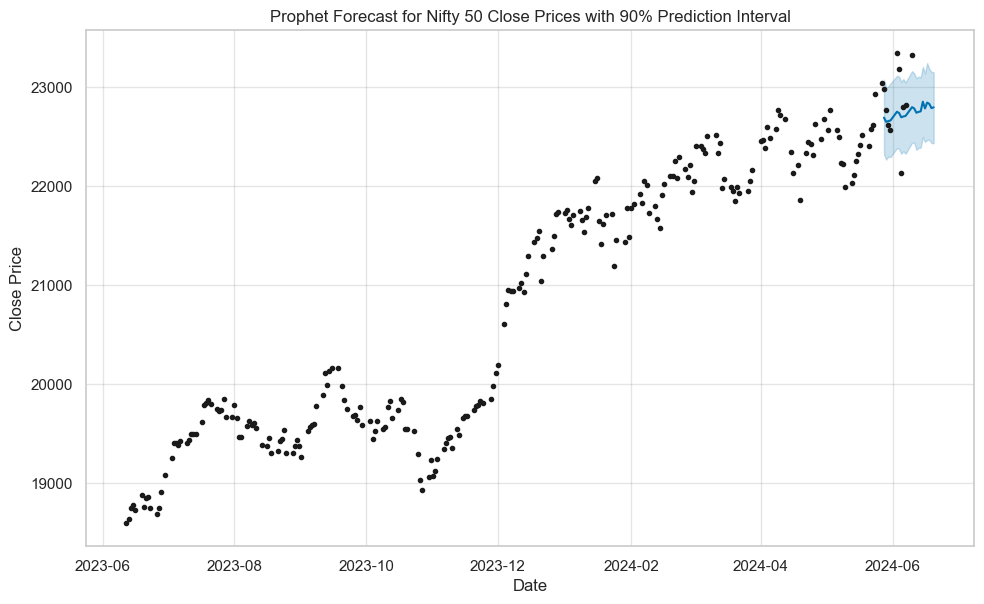

In [14]:
fig = model.plot(forecast.tail(20))
plt.title('Prophet Forecast for Nifty 50 Close Prices with 90% Prediction Interval')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

### 2.VAR(Vector AutoRegression) Model (Multivariate Time Series Model) ✅

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

In [16]:
# Reloading the csv as it is modified for previous model
data = pd.read_csv("./NIFTY 50-11-06-2023-to-11-06-2024.csv")
data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date']) 
data.set_index('Date', inplace=True) 
# Select the features for forecasting
features = data[['Open', 'High', 'Low', 'Close','Shares Traded','Turnover (₹ Cr)']]

## ADF (Augmented Dickey-Fuller) Test 
##### It is used to check if the time series is stationary or not . 
##### Here Stationary means time series has constant mean, variance, and autocorrelation over time.

In [17]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out)
    print('')

# Check stationarity for each feature
for column in features.columns:
    adf_test(features[column], title=column)

Augmented Dickey-Fuller Test: Open
ADF Test Statistic              -0.589902
p-value                          0.873248
#Lags Used                       3.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64

Augmented Dickey-Fuller Test: High
ADF Test Statistic              -0.492832
p-value                          0.893408
#Lags Used                       2.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64

Augmented Dickey-Fuller Test: Low
ADF Test Statistic              -0.504535
p-value                          0.891128
#Lags Used                       7.000000
Number of Observations Used    240.000000
Critical Value (1%)             -3.457894
Critical Value (5%)             -2.873659
Critical Value (10%)    

### Key Components of the ADF Test Output:
##### 1. ADF Test Statistic: The value of the test statistic. If this value is more negative than the critical values, the null hypothesis of a unit root (non-stationarity) is rejected.
##### 2. p-value: The probability that the observed data could be seen under the null hypothesis. A low p-value (typically less than 0.05) indicates that the null hypothesis can be rejected.
##### 3. #Lags Used: The number of lagged differences included in the test to account for autocorrelation.
##### 4. Number of Observations Used: The number of observations used in the test after lagged differences are included.
##### 5. Critical Values: The threshold values at different significance levels (1%, 5%, 10%). If the ADF test statistic is less than these values, the null hypothesis of a unit root is rejected.


#### Example for 'Open' :- (NON Stationary)
##### 1. The ADF Test Statistic (-0.589902) is higher than the critical values.
##### 2. The p-value (0.873248) is much higher than 0.05.
##### 3. Conclusion: Fail to reject the null hypothesis. The "Open" series is non-stationary.
#### Example for 'Shares Traded' :- (Stationary)
##### 1. The ADF Test Statistic (-6.458610) is much lower than the critical values.
##### 2. The p-value (1.462156e-08) is much lower than 0.05.
##### 3. Conclusion: Reject the null hypothesis. The "Shares Traded" series is stationary.

Augmented Dickey-Fuller Test: Open Differenced
ADF Test Statistic            -1.057421e+01
p-value                        7.175163e-19
#Lags Used                     2.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64

Augmented Dickey-Fuller Test: High Differenced
ADF Test Statistic            -1.244035e+01
p-value                        3.765450e-23
#Lags Used                     1.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64

Augmented Dickey-Fuller Test: Low Differenced
ADF Test Statistic            -7.375232e+00
p-value                        8.757879e-11
#Lags Used                     6.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457

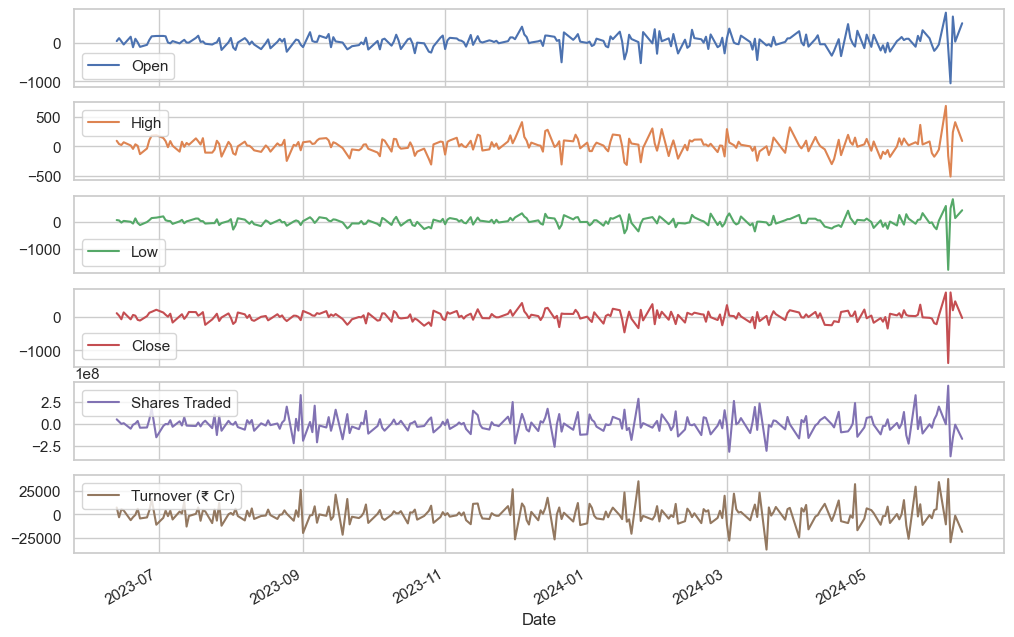

In [18]:
# Make Data Stationary
features_diff = features.diff().dropna()

# Check stationarity again after differencing
for column in features_diff.columns:
    adf_test(features_diff[column], title=f'{column} Differenced')

# Plot the differenced series
features_diff.plot(subplots=True, figsize=(12, 8))
plt.show()

In [19]:
# Check Values Manually 
for column in features_diff.columns:
    adf_test(features_diff[column], title=column)

Augmented Dickey-Fuller Test: Open
ADF Test Statistic            -1.057421e+01
p-value                        7.175163e-19
#Lags Used                     2.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64

Augmented Dickey-Fuller Test: High
ADF Test Statistic            -1.244035e+01
p-value                        3.765450e-23
#Lags Used                     1.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64

Augmented Dickey-Fuller Test: Low
ADF Test Statistic            -7.375232e+00
p-value                        8.757879e-11
#Lags Used                     6.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)         

In [20]:
model = VAR(features_diff)
lag_order = model.select_order(maxlags=20)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        91.24       91.33   4.223e+39       91.28
1        89.21      89.84*   5.518e+38       89.46
2        88.84       90.02   3.844e+38       89.32
3        88.55       90.27   2.876e+38      89.25*
4       88.43*       90.69  2.551e+38*       89.34
5        88.47       91.28   2.668e+38       89.60
6        88.44       91.79   2.612e+38       89.79
7        88.50       92.39   2.793e+38       90.07
8        88.48       92.91   2.773e+38       90.27
9        88.62       93.60   3.255e+38       90.63
10       88.70       94.22   3.599e+38       90.93
11       88.80       94.87   4.108e+38       91.25
12       88.86       95.46   4.482e+38       91.52
13       88.96       96.11   5.182e+38       91.85
14       89.07       96.77   6.081e+38       92.18
15       89.10       97.34   6.632e+38       92.43
16       88.98       97.76   6.

c:\users\win10\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
model_fitted = model.fit(lag_order.aic)
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 13, Jun, 2024
Time:                     20:53:25
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    90.2565
Nobs:                     243.000    HQIC:                   88.9688
Log likelihood:          -12623.0    FPE:                1.83385e+38
AIC:                      88.1003    Det(Omega_mle):     1.01904e+38
--------------------------------------------------------------------
Results for equation Open
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      9.579328         6.564422            1.459           0.144
L1.Open                   -0.624016         0.120184           -5.192           0.000
L1.High                   -0.185390      

In [22]:
# Check residuals
# Extract residuals
residuals = model_fitted.resid

# Apply ADF test on residuals
for column in residuals.columns:
    adf_test(residuals[column], title=f'Residuals of {column}')

Augmented Dickey-Fuller Test: Residuals of Open
ADF Test Statistic            -5.856039e+00
p-value                        3.498310e-07
#Lags Used                     8.000000e+00
Number of Observations Used    2.340000e+02
Critical Value (1%)           -3.458608e+00
Critical Value (5%)           -2.873972e+00
Critical Value (10%)          -2.573396e+00
dtype: float64

Augmented Dickey-Fuller Test: Residuals of High
ADF Test Statistic            -1.560163e+01
p-value                        1.826128e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64

Augmented Dickey-Fuller Test: Residuals of Low
ADF Test Statistic            -1.623277e+01
p-value                        3.796664e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.

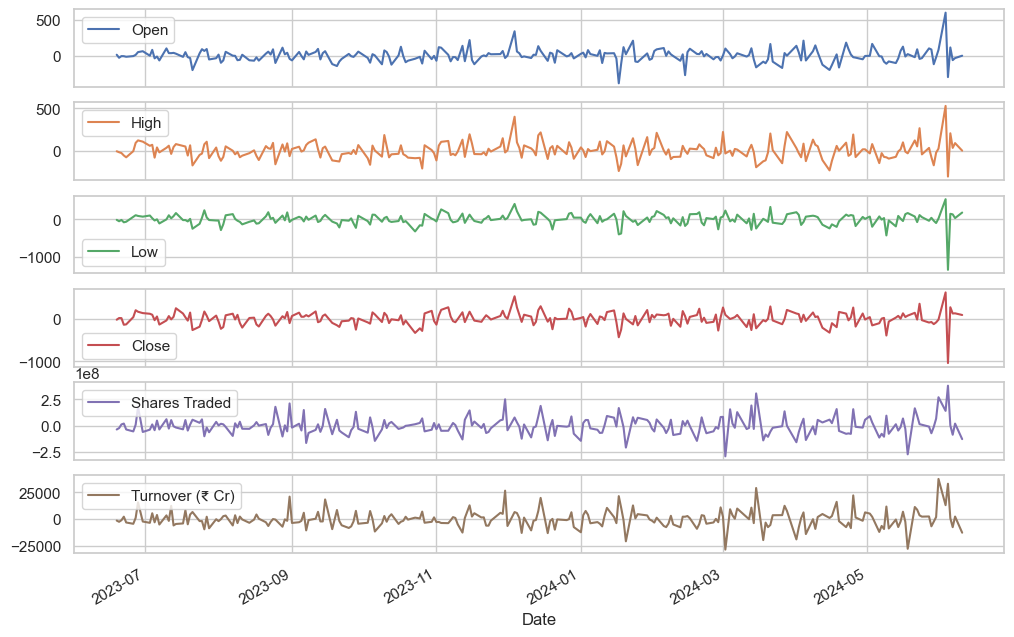

In [23]:
residuals.plot(subplots=True, figsize=(12, 8))
plt.show()

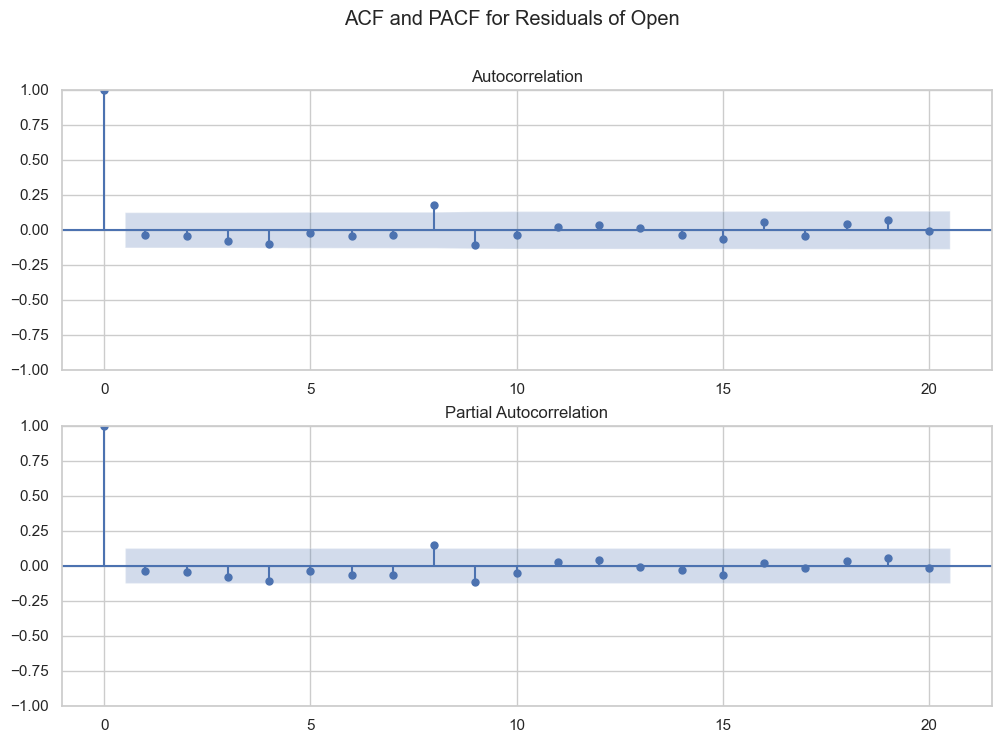

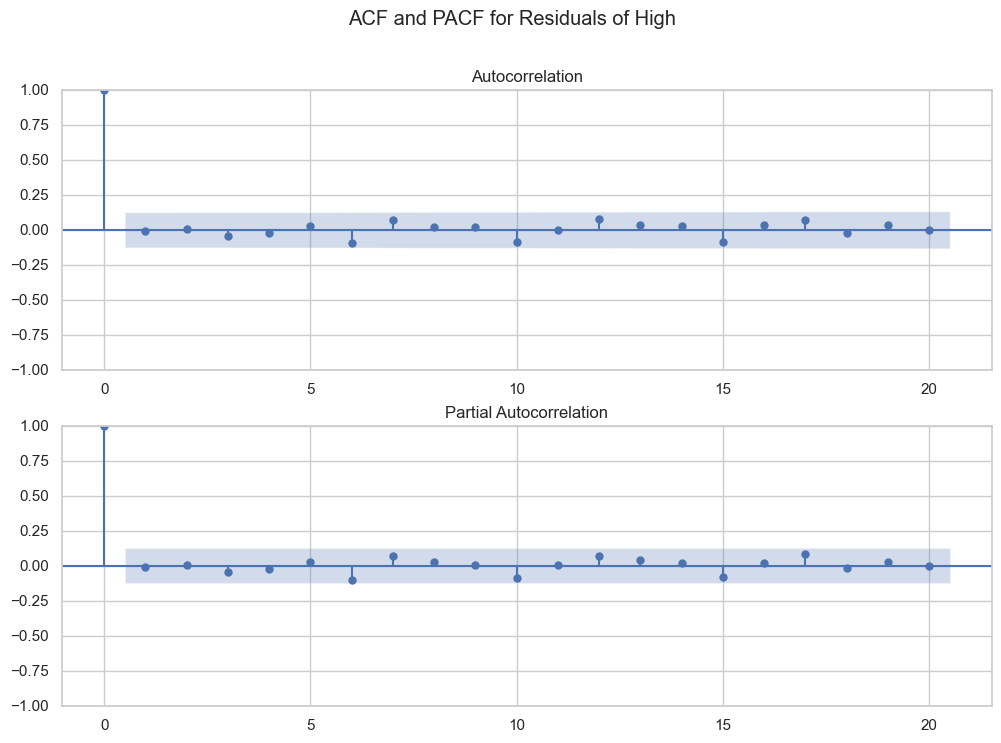

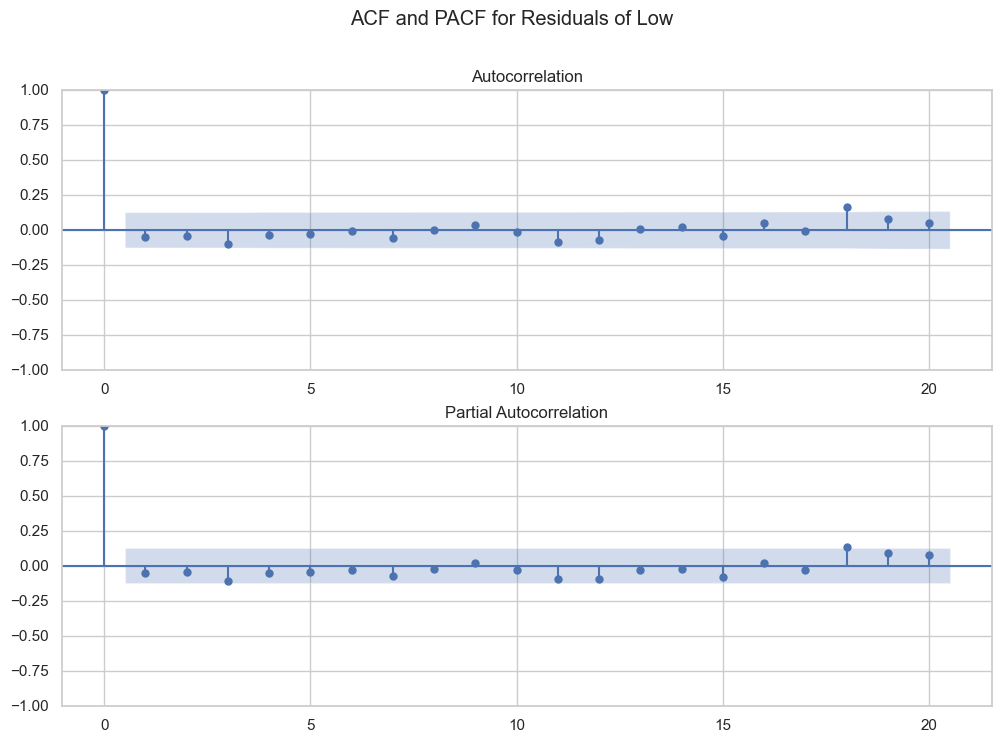

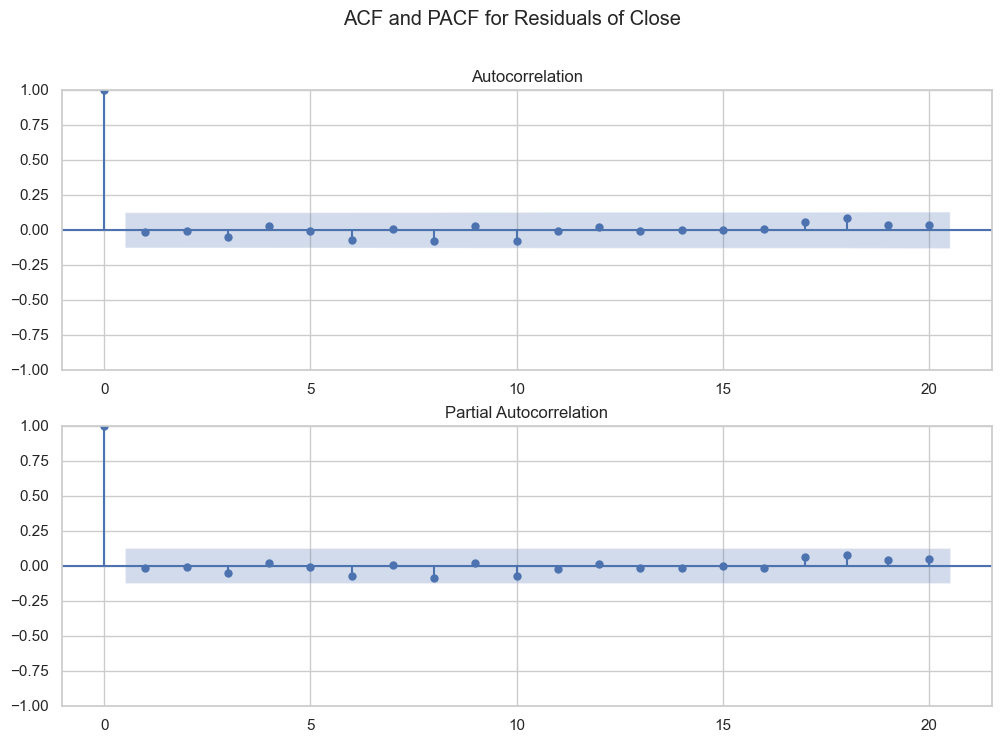

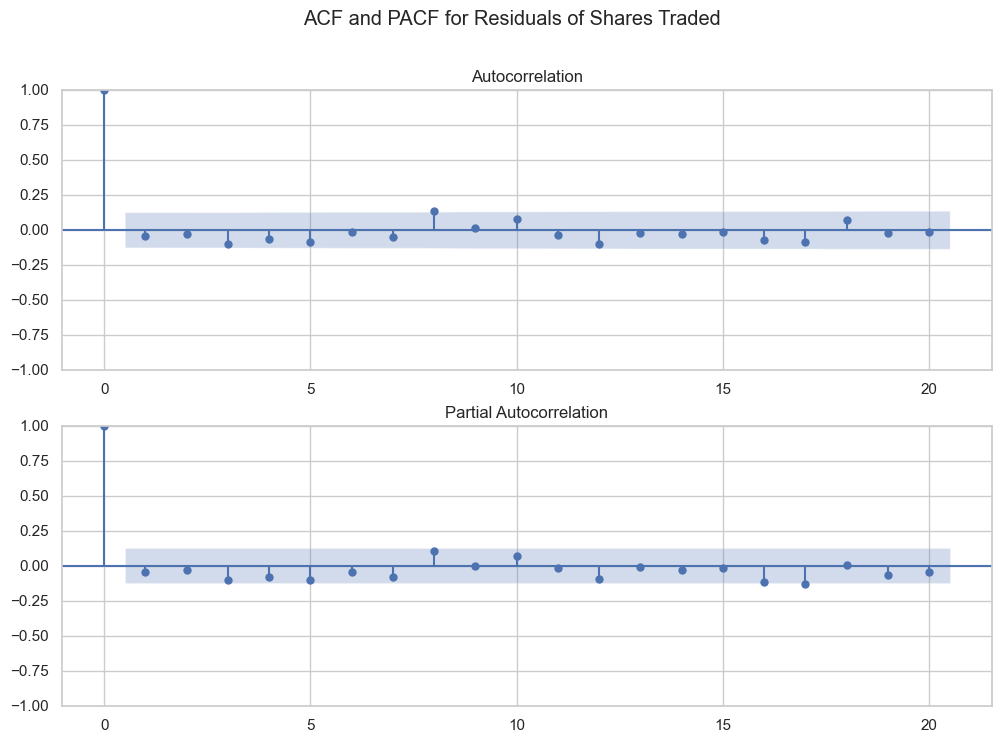

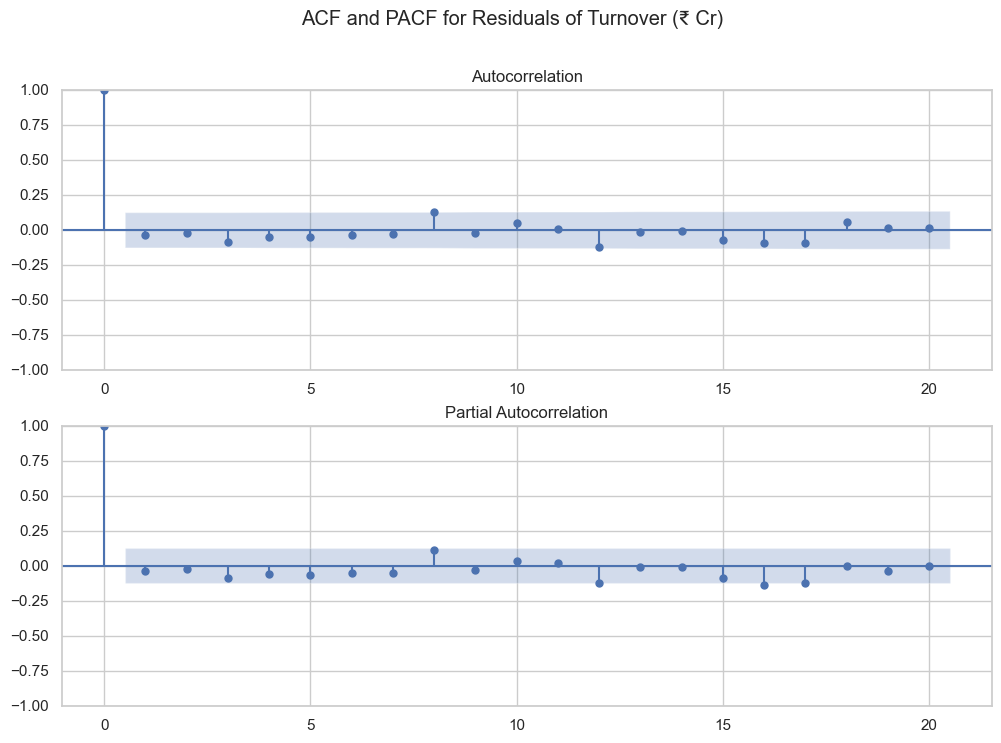

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for each residual
for column in residuals.columns:
    fig, ax = plt.subplots(2, figsize=(12, 8))
    plot_acf(residuals[column], lags=20, ax=ax[0])
    plot_pacf(residuals[column], lags=20, ax=ax[1])
    plt.suptitle(f'ACF and PACF for Residuals of {column}')
    plt.show()

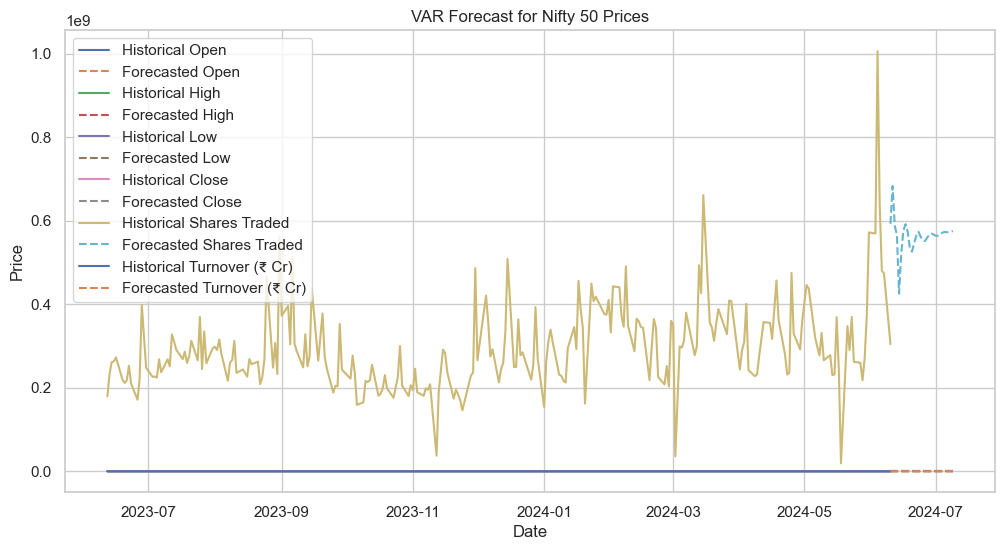

In [25]:
# Forecasting the next 30 steps
forecast_steps = 30
forecast = model_fitted.forecast(y=features_diff.values[-lag_order.aic:], steps=forecast_steps)

# Convert the forecast to a DataFrame
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=features.index[-1], periods=forecast_steps), columns=features.columns)

# Inverse differencing to get the forecasted values
forecast_df = forecast_df.cumsum() + features.iloc[-1]
forecast_df.to_csv('Forecast.csv')
# Plot the forecast
plt.figure(figsize=(12, 6))
for column in forecast_df.columns:
    plt.plot(features.index, features[column], label=f'Historical {column}')
    plt.plot(forecast_df.index, forecast_df[column], label=f'Forecasted {column}', linestyle='dashed')
plt.title('VAR Forecast for Nifty 50 Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [27]:
#Save model 
import pickle
with open('var_model','wb') as f: 
    pickle.dump(model_fitted,f)